In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/arjuntejaswi/plant-village",force=True)

In [ ]:
import os

dataset_path = '/content/plant-village'
os.listdir(dataset_path)

['PlantVillage']

In [ ]:
dataset_directory = '/content/plant-village/PlantVillage'
directory_list = [dir for dir in os.listdir(dataset_directory) if not dir.startswith('.')]
directory_list

['Pepper__bell___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Late_blight',
 'Tomato_healthy',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Potato___healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Potato___Early_blight',
 'Tomato_Leaf_Mold',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Potato___Late_blight']

In [ ]:
for i in directory_list:
  print(len(os.listdir(f'/content/plant-village/PlantVillage/{i}')))

1478
2127
1909
1591
1771
3209
373
152
1676
1000
952
997
1000
1404
1000


In [ ]:
total_images = 0
for i in directory_list:
  total_images += len(os.listdir(f'/content/plant-village/PlantVillage/{i}'))
print(f"Total number of images in the dataset: {total_images}")

Total number of images in the dataset: 20639


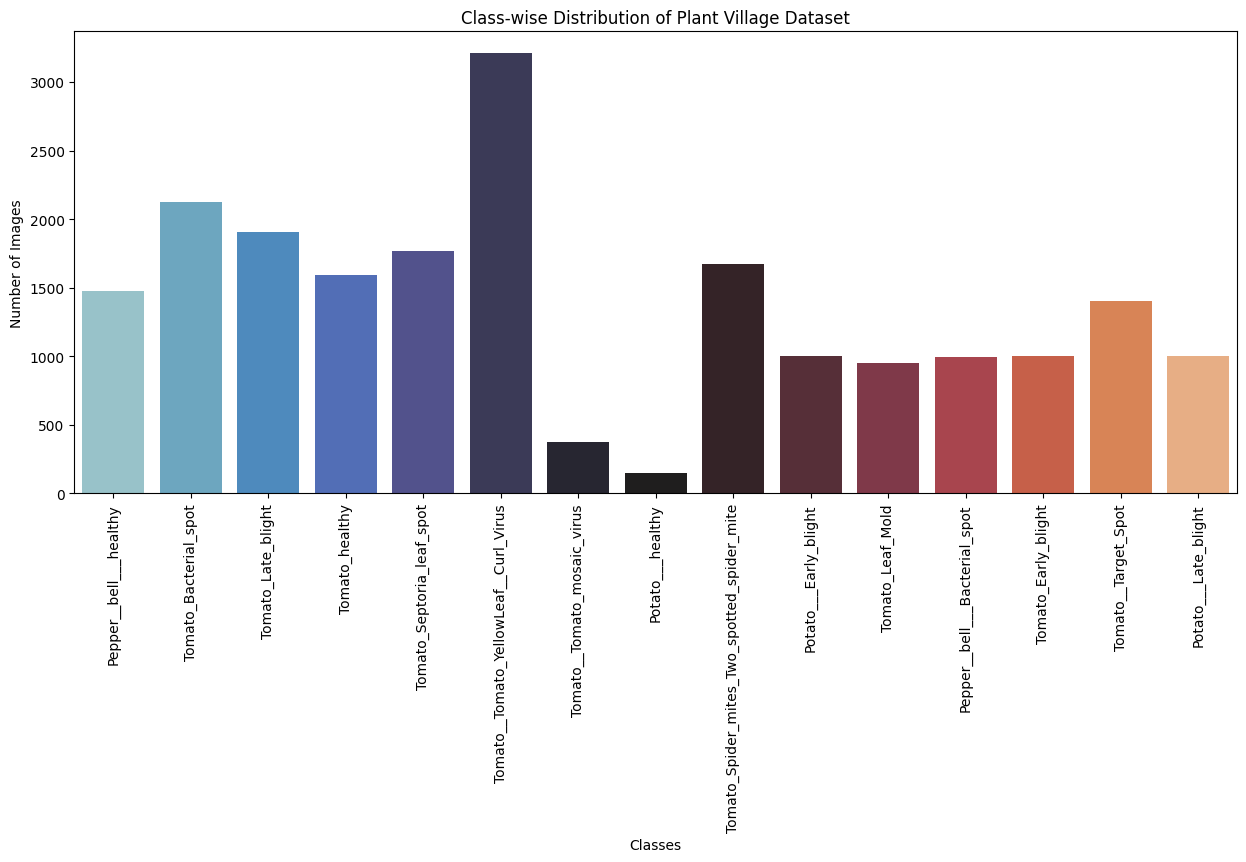

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store the class distribution
class_distribution = {}
for i in directory_list:
  class_distribution[i] = len(os.listdir(f'/content/plant-village/PlantVillage/{i}'))

# Convert the dictionary to a list for plotting
class_names = list(class_distribution.keys())
class_counts = list(class_distribution.values())

# Create the bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=class_names, y=class_counts, palette="icefire", hue=class_names, legend=False)
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class-wise Distribution of Plant Village Dataset")
plt.show()

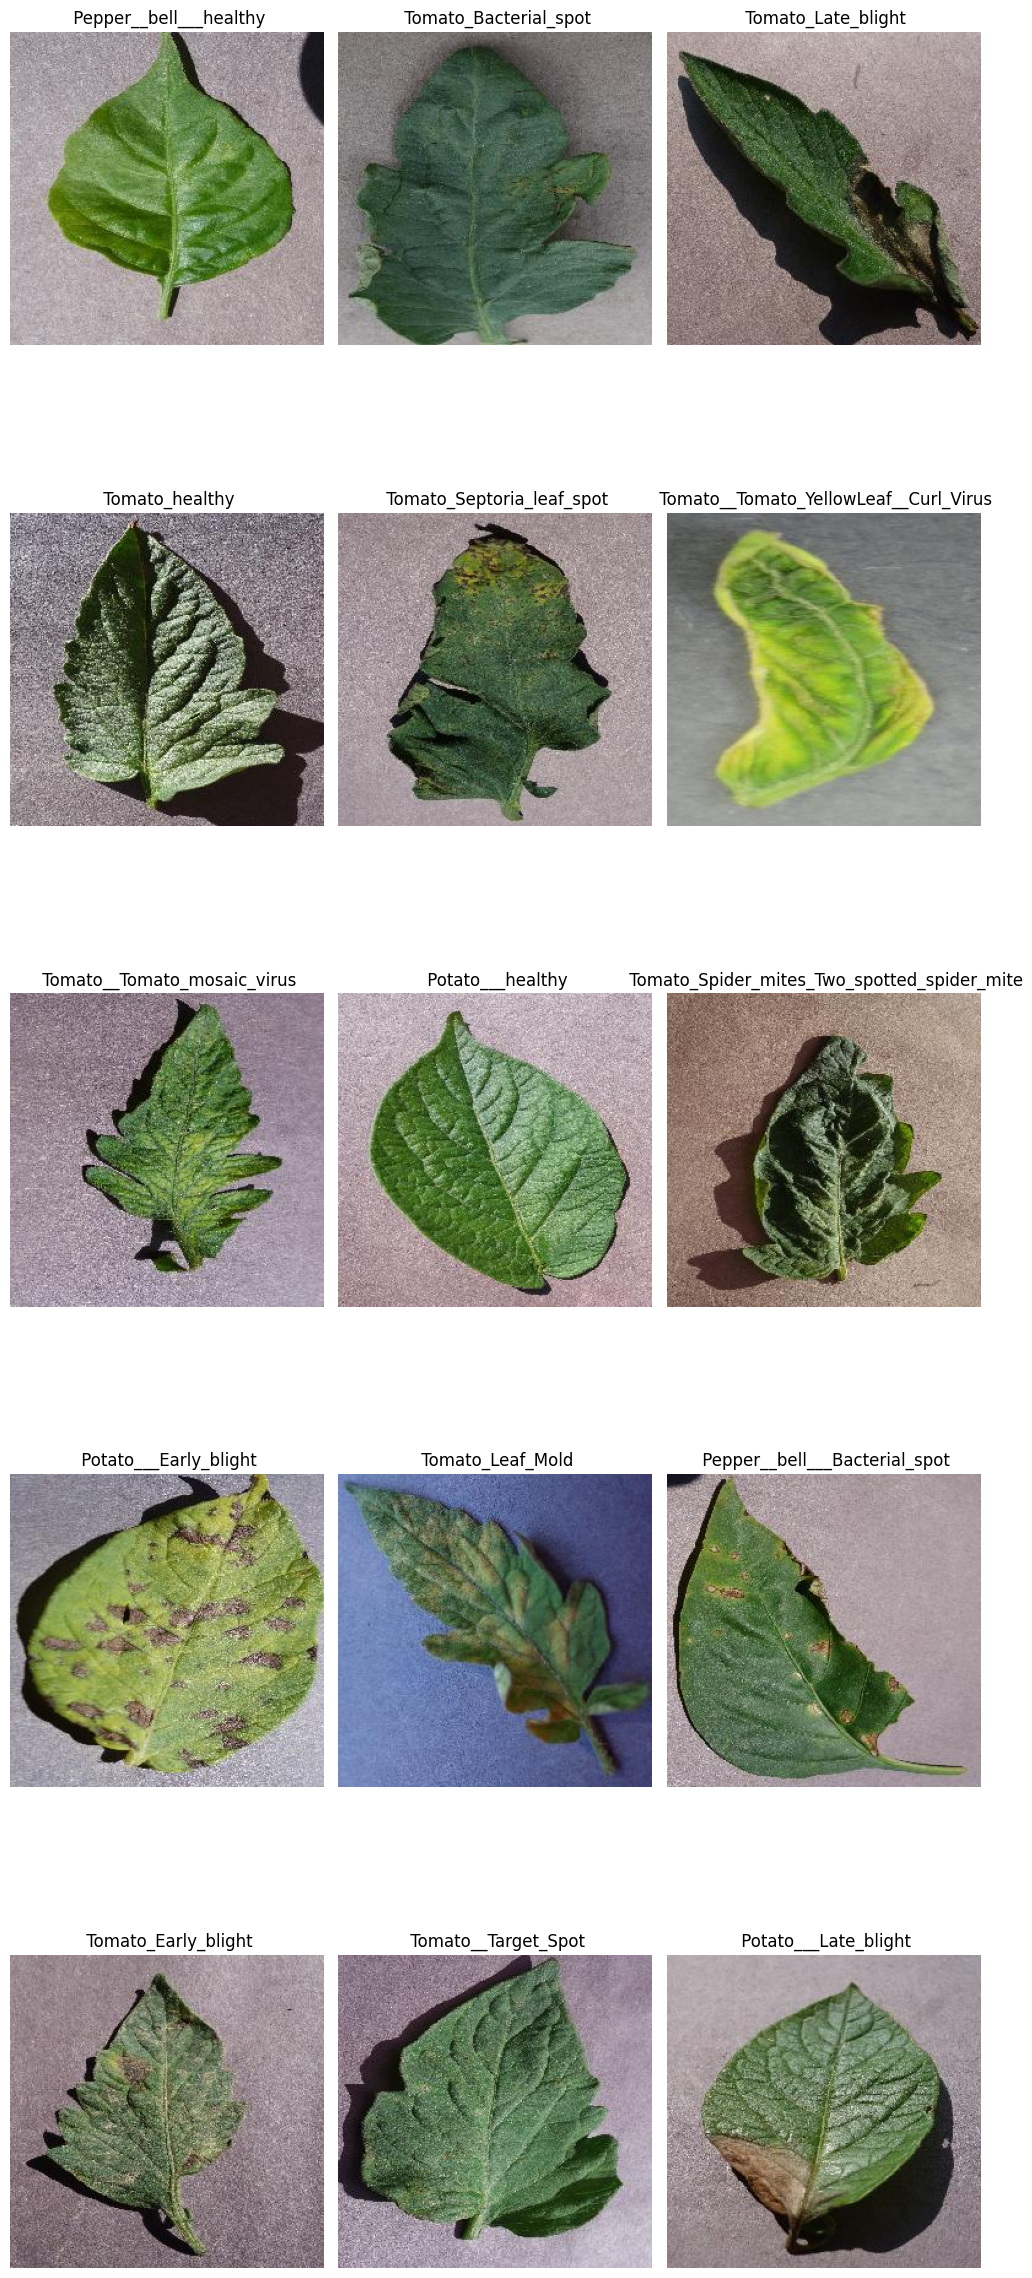

In [ ]:
import random
import matplotlib.image as mpimg
import math

base_path = '/content/plant-village/PlantVillage/'

# Get the list of all subdirectories (these are your labels)
directory_list = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

# Randomly choose an image from each subdirectory
random_images = []

for directory in directory_list:
    # Get all jpg files in the current directory
    jpg_files = [f for f in os.listdir(os.path.join(base_path, directory)) if f.lower().endswith('.jpg')]

    if jpg_files:
        # Select a random image from the list of jpg files
        random_image = random.choice(jpg_files)
        random_images.append((directory, random_image))

# Number of columns
columns = 3  # Change this to adjust the number of columns

# Calculate the number of rows needed based on the total number of images and columns
rows = math.ceil(len(random_images) / columns)

# Display the random images with their labels in a grid structure
plt.figure(figsize=(10, rows * 5))  # Adjust figure size based on number of rows

for i, (label, image_file) in enumerate(random_images, start=1):
    # Read the image
    img_path = os.path.join(base_path, label, image_file)
    img = mpimg.imread(img_path)

    # Calculate the subplot position
    plt.subplot(rows, columns, i)

    # Display the image with the label as the title
    plt.imshow(img)
    plt.title(f' {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!pip install split-folders
import splitfolders

splitfolders.ratio('/content/plant-village/PlantVillage/',output='/content/Dataset/', seed=400, ratio=(0.8,0.1,0.1))

train_path = '/content/Dataset/train'
val_path = '/content/Dataset/val'
test_path = '/content/Dataset/test'

Copying files: 20639 files [00:11, 1725.78 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths
batch_size = 32
image_size = (256, 256)

datagen = ImageDataGenerator(rescale=1./255, rotation_range=140, brightness_range=[0.4,1.0], horizontal_flip=True, vertical_flip=True)

train_data = datagen.flow_from_directory(train_path, target_size=image_size, batch_size=batch_size, class_mode='categorical')
val_data = datagen.flow_from_directory(val_path, target_size=image_size, batch_size=batch_size, class_mode='categorical')
test_data = datagen.flow_from_directory(test_path, target_size=image_size, batch_size=batch_size, class_mode='categorical')

Found 16505 images belonging to 15 classes.
Found 2057 images belonging to 15 classes.
Found 2076 images belonging to 15 classes.


In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),

    layers.Dense(15, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 15)                  │             495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,521,359 (70.65 MB)

 Trainable params: 18,521,359 (70.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn = model.fit(train_data, epochs=25, validation_data=val_data)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


516/516 ━━━━━━━━━━━━━━━━━━━━ 368s 657ms/step - accuracy: 0.2183 - loss: 2.3505 - val_accuracy: 0.3666 - val_loss: 1.8777
Epoch 2/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 348s 626ms/step - accuracy: 0.4437 - loss: 1.6282 - val_accuracy: 0.5858 - val_loss: 1.2437
Epoch 3/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 388s 639ms/step - accuracy: 0.6594 - loss: 1.0144 - val_accuracy: 0.7560 - val_loss: 0.7429
Epoch 4/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 375s 627ms/step - accuracy: 0.7440 - loss: 0.7261 - val_accuracy: 0.7890 - val_loss: 0.6253
Epoch 5/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 344s 661ms/step - accuracy: 0.8038 - loss: 0.5832 - val_accuracy: 0.7832 - val_loss: 0.6450
Epoch 6/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 362s 623ms/step - accuracy: 0.8353 - loss: 0.4938 - val_accuracy: 0.8819 - val_loss: 0.3494
Epoch 7/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 380s 619ms/step - accuracy: 0.8694 - loss: 0.3862 - val_accuracy: 0.8605 - val_loss: 0.3977
Epoch 8/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 382s 617ms/step - accuracy: 0.8867 - loss: 0.34

In [ ]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_data, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 95.3105092048645
The Loss of the model for training data is: 0.1538187861442566
The accuracy of the model for validation data is: 93.33981275558472
The Loss of the model for validation data is: 0.20466916263103485


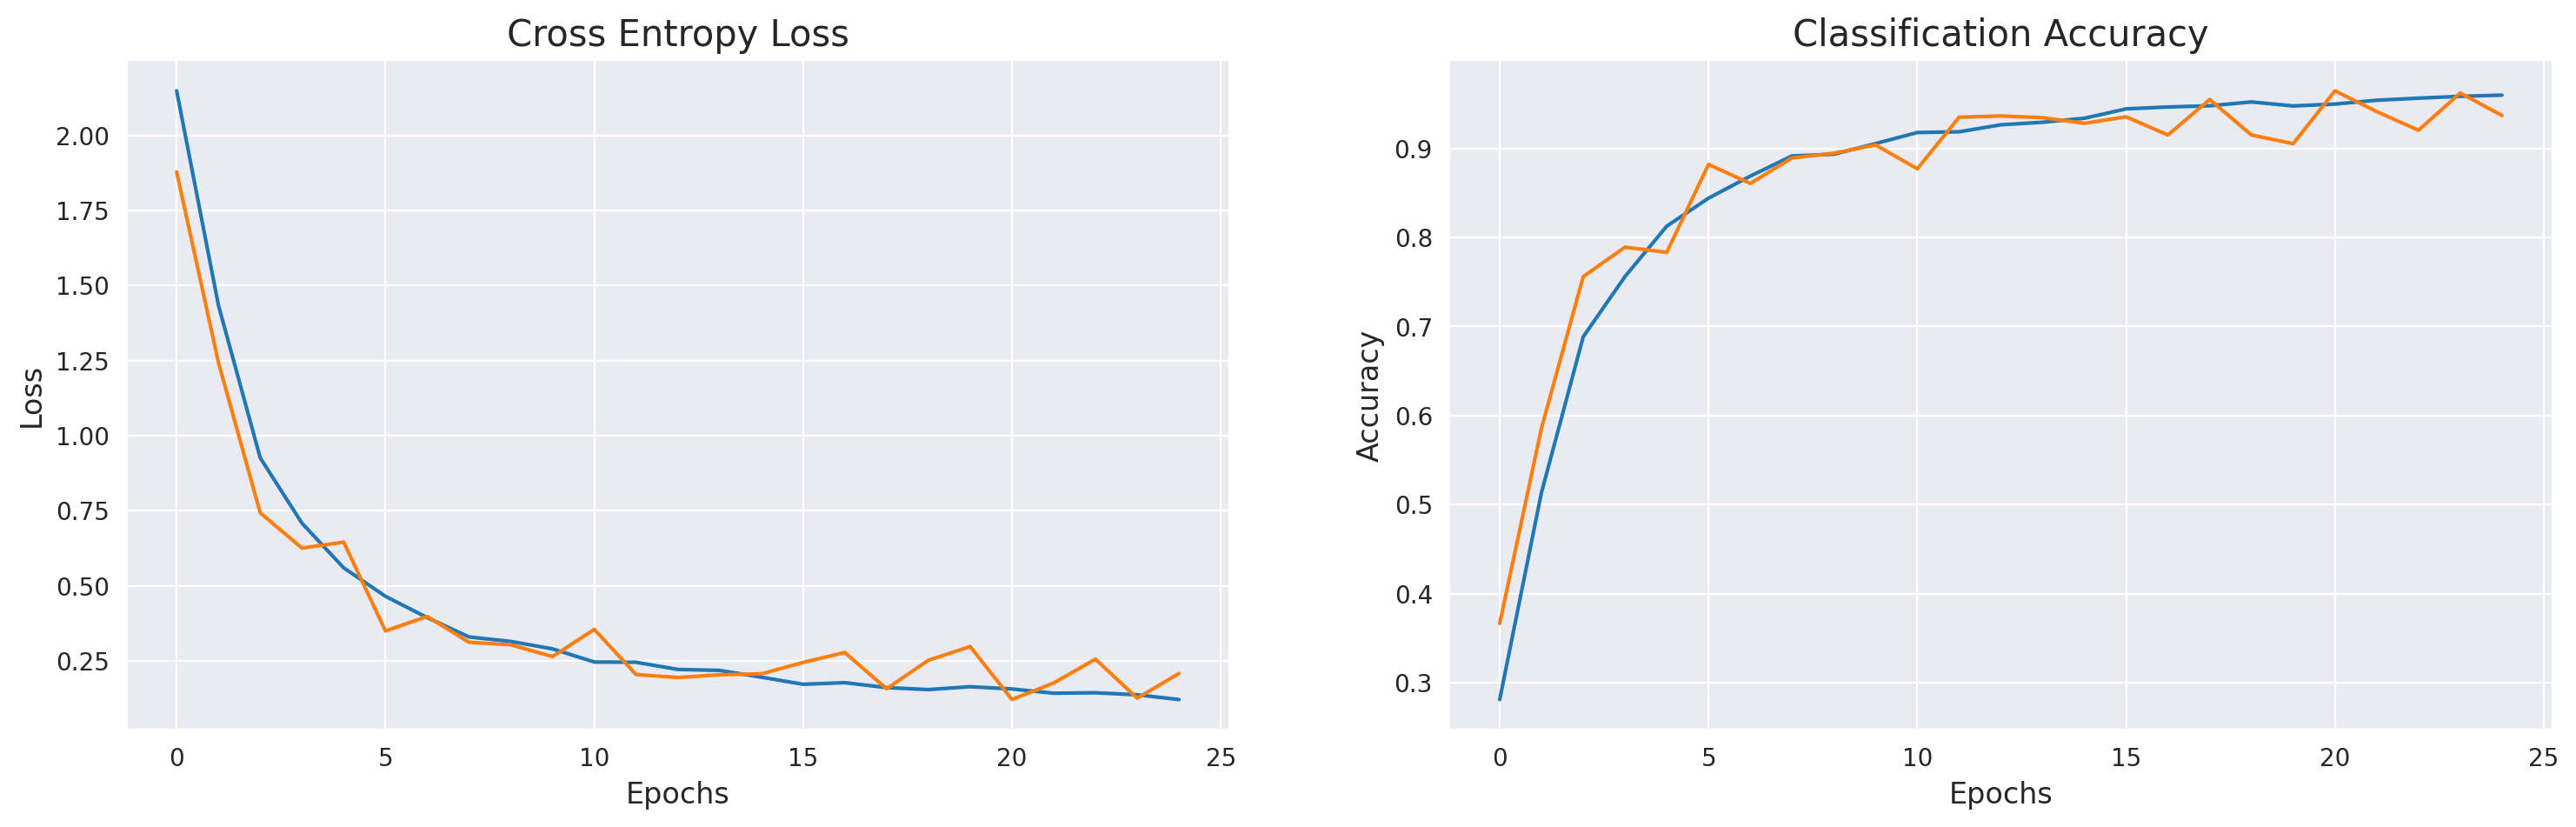

In [ ]:
import numpy as np
import pandas as pd

eval = pd.DataFrame(cnn.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(eval['loss'])
plt.plot(eval['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(eval['accuracy'])
plt.plot(eval['val_accuracy'])

plt.show()

In [ ]:
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 94.31599378585815
The Loss of the model for testing data is: 0.1732928305864334


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


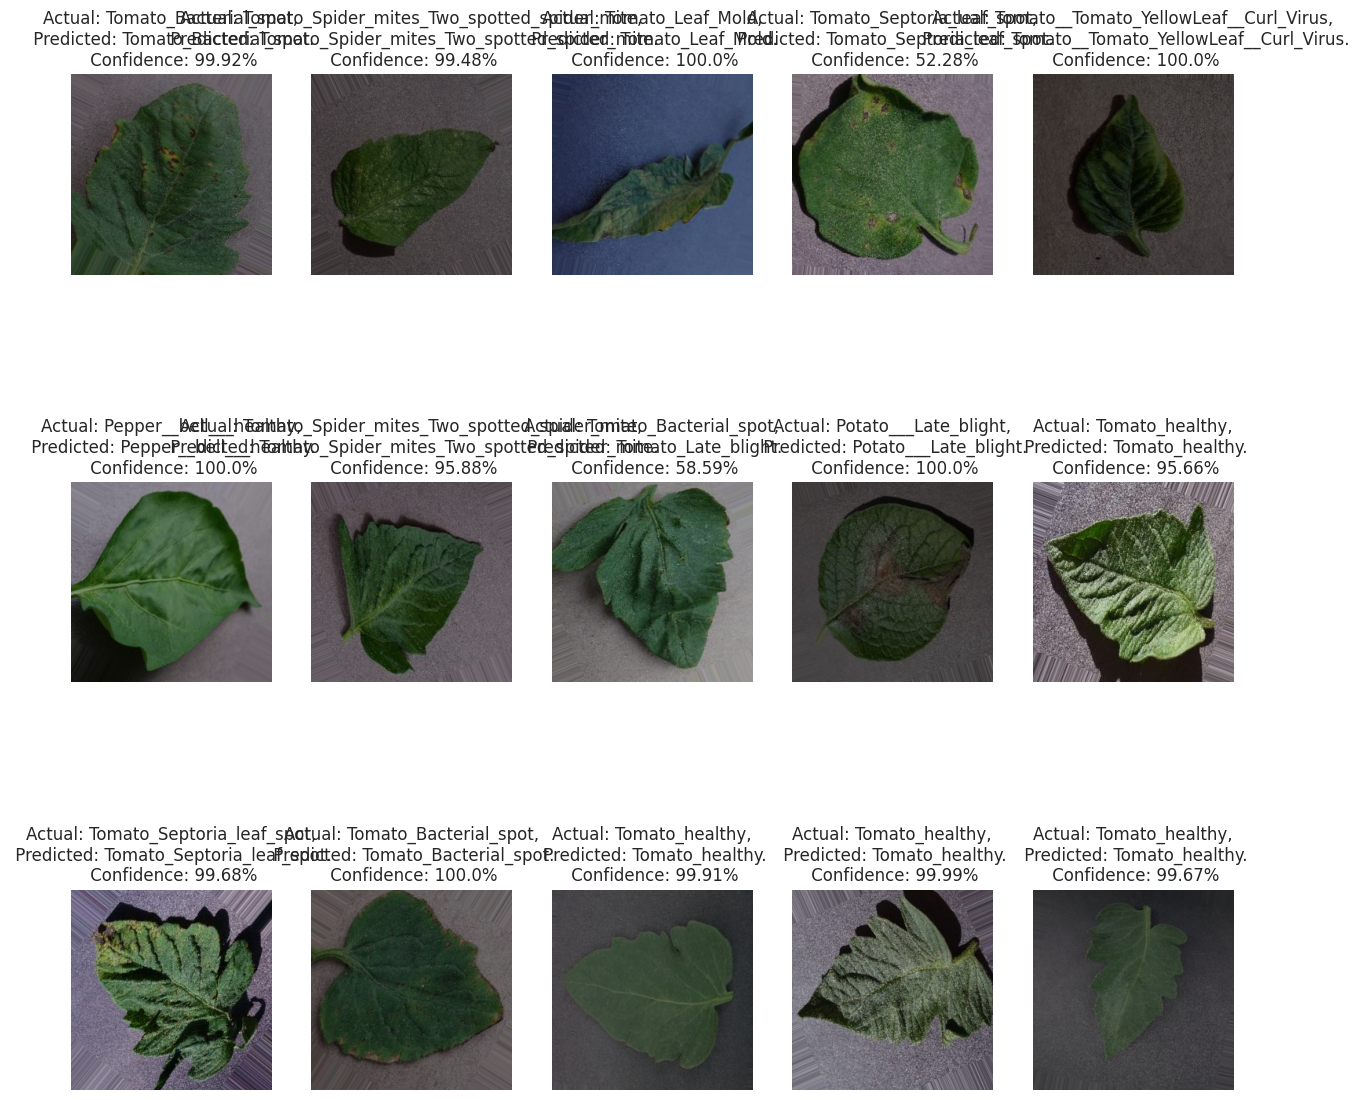

In [ ]:
class_names = list(train_data.class_indices.keys())
class_names

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_data:
    for i in range(15):
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=10)

        plt.axis("off")
    break

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_true, y_pred,target_names= class_names, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score  \
Pepper__bell___healthy                        0.050505  0.049505  0.050000   
Tomato_Bacterial_spot                         0.109677  0.114094  0.111842   
Tomato_Late_blight                            0.060000  0.060000  0.060000   
Tomato_healthy                                0.040816  0.040000  0.040404   
Tomato_Septoria_leaf_spot                     0.000000  0.000000  0.000000   
Tomato__Tomato_YellowLeaf__Curl_Virus         0.097778  0.102804  0.100228   
Tomato__Tomato_mosaic_virus                   0.084337  0.070000  0.076503   
Potato___healthy                              0.091346  0.098958  0.095000   
Tomato_Spider_mites_Two_spotted_spider_mite   0.070796  0.083333  0.076555   
Potato___Early_blight                         0.144828  0.117978  0.130031   
Tomato_Leaf_Mold                              0.074074  0.082840  0.078212   
Pepper__bell___Bacterial_spot                 0.023810  0.021277  0.022472   
Tomato_Early_blight                           0.164134  0.167702  0.165899   
Tomato__Target_Spot                           0.000000  0.000000  0.000000   
Potato___Late_blight                          0.081761  0.081250  0.081505   
accuracy                                      0.092967  0.092967  0.092967   
macro avg                                     0.072924  0.072649  0.072577   
weighted avg                                  0.092874  0.092967  0.092695   

                                                 support  
Pepper__bell___healthy                        101.000000  
Tomato_Bacterial_spot                         149.000000  
Tomato_Late_blight                            100.000000  
Tomato_healthy                                100.000000  
Tomato_Septoria_leaf_spot                      16.000000  
Tomato__Tomato_YellowLeaf__Curl_Virus         214.000000  
Tomato__Tomato_mosaic_virus                   100.000000  
Potato___healthy                              192.000000  
Tomato_Spider_mites_Two_spotted_spider_mite    96.000000  
Potato___Early_blight                         178.000000  
Tomato_Leaf_Mold                              169.000000  
Pepper__bell___Bacterial_spot                 141.000000  
Tomato_Early_blight                           322.000000  
Tomato__Target_Spot                            38.000000  
Potato___Late_blight                          160.000000  
accuracy                                        0.092967  
macro avg                                    2076.000000  
weighted avg                                 2076.000000

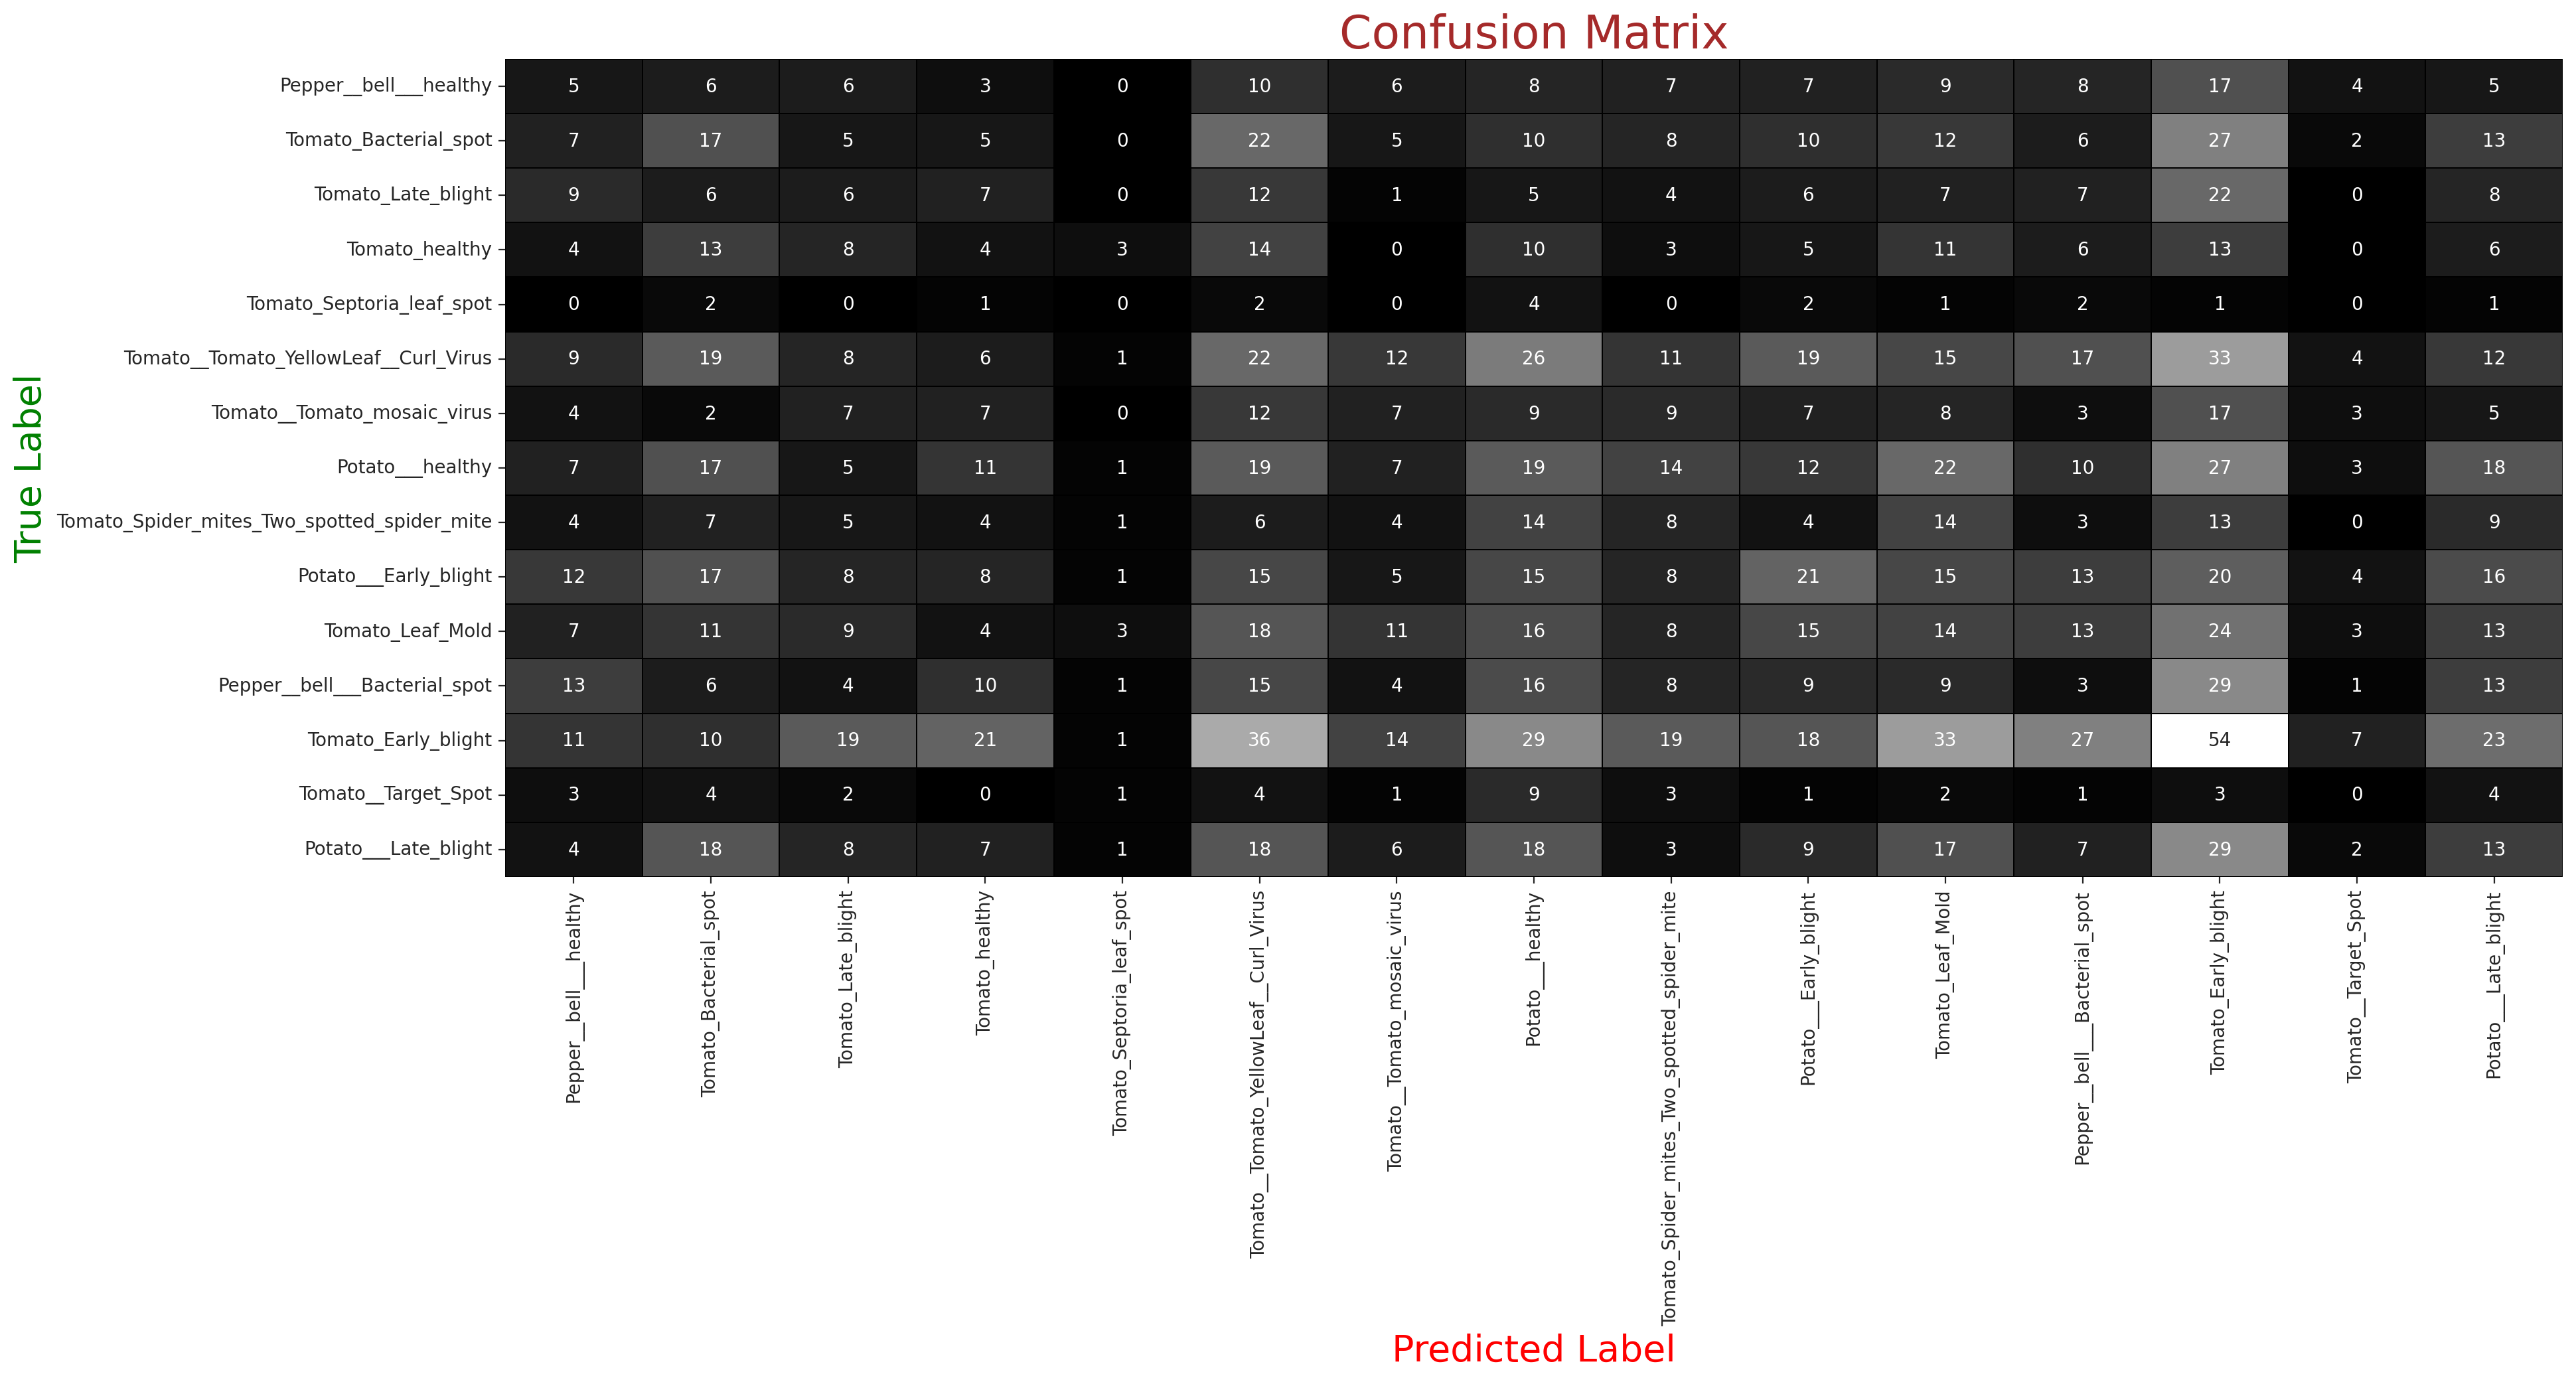

In [ ]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.1, cmap = "gist_yarg_r",
            linecolor="black", fmt='.0f', ax=ax,
            cbar=False, xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()

In [ ]:
# Get the class indices from the train_generator
class_indices = train_data.class_indices

# Display the class names in a sorted order
print("Class names and their indices:")
for class_name, index in sorted(class_indices.items(), key=lambda x: x[1]):
    print(f"{index}: {class_name}")

Class names and their indices:
0: Pepper__bell___Bacterial_spot
1: Pepper__bell___healthy
2: Potato___Early_blight
3: Potato___Late_blight
4: Potato___healthy
5: Tomato_Bacterial_spot
6: Tomato_Early_blight
7: Tomato_Late_blight
8: Tomato_Leaf_Mold
9: Tomato_Septoria_leaf_spot
10: Tomato_Spider_mites_Two_spotted_spider_mite
11: Tomato__Target_Spot
12: Tomato__Tomato_YellowLeaf__Curl_Virus
13: Tomato__Tomato_mosaic_virus
14: Tomato_healthy


In [ ]:
from google.colab import files

model_save_path = '/content/model.keras'

model.save(model_save_path)

files.download(model_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>